In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

In [3]:
sp.init_printing()

In [4]:
x

NameError: name 'x' is not defined

In [5]:
x = sp.symbols('x')

In [6]:
x

In [7]:
5 * x

In [8]:
x, nu, t = sp.symbols('x nu t')
phi = (sp.exp(-(x - 4 * t)**2 / (4 * nu *(t + 1))) +
      sp.exp(-(x - 4 * t - 2 *np.pi)**2 / (4 * nu * (t + 1))))
phi

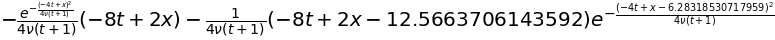

In [9]:
phiprime = phi.diff(x)
phiprime

In [10]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [12]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [13]:
u_lamb = lambdify((t, x, nu), u)
print('The value of u at t=1, x=4, nu=3 is {}'.format(u_lamb(1, 4, 3)))

The value of u at t=1, x=4, nu=3 is 3.4917066420644494


In [14]:
# Set parameters.
nx = 101  #number of spatial grid points
L = 2.0 * np.pi #length of the domain
dx = L / (nx - 1) #spatial grid size
nu = 0.07 #viscosity
nt = 100 #number of time steps to compute
sigma = 0.1 #CFL limit
dt = sigma * dx **2 / nu #time-step size

# Discretize the domain.
x = np.linspace(0.0, L, num=nx)

In [15]:
# Set initial conditions.
t = 0.0
u0 = np.array([u_lamb(t, xi, nu) for xi in x])
u0

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

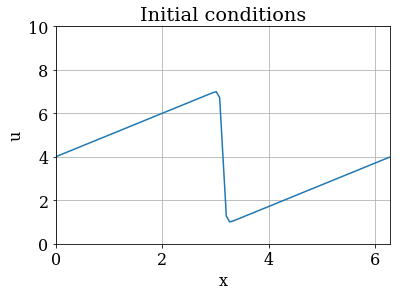

In [19]:
# Plot the initial conditions.
plt.figure(figsize=(6.0, 4.0))
plt.title('Initial conditions')
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.plot(x, u0)
plt.xlim(0.0, L)
plt.ylim(0.0, 10.0);

In [22]:
# Integrate the Burgers' equation in time.
u = u0.copy()
for n in range(nt):
    un = u.copy()
    # Update all interior points.
    u[1: -1] = (un[1:-1] -
                un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
                nu * dt / dx**2 *(un[2:] -2 *un[1:-1] + un[:-2]))
    # Update boundary points.
    u[0] = (un[0] - 
            un[0] * dt / dx * (un[0] - un[-1]) + 
            nu * dt / dx **2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = (un[-1] -
             un[-1] * dt / dx * (un[-1] - un[-2]) +
             nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))

In [24]:
# Compute the analytical solution.
u_analytical = np.array([u_lamb(nt * dt, xi, nu) for xi in x])

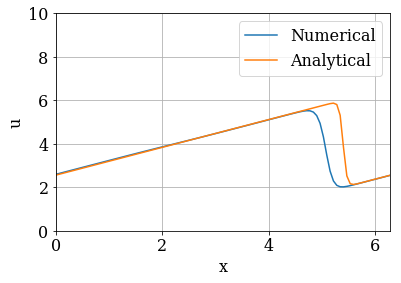

In [26]:
# Plot the numerical solution along with the analytical solution.
plt.figure(figsize = (6.0, 4.0))
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.plot(x, u, label = 'Numerical')
plt.plot(x, u_analytical, label = 'Analytical')
plt.legend()
plt.xlim(0.0, L)
plt.ylim(0.0, 10.0);

In [27]:
from matplotlib import animation
from IPython.display import HTML

In [28]:
def burgers(u0, dx, dt, nu, nt=20):
    """
    Computes the numerical solution of the 1D Burgers' equation
    over the time steps.
    
    Parameters
    ----------
    u0 : numpy.ndarray
        The initial conditions as a 1D array of floats.
    dx : float
        The grid spacing.
    dt : float
        The time-step size.
    nu : float
        The viscosity.
    nt : integer, optional
        The number of time steps to compute;
        default: 20.
    
    Returns
    -------
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        # Update all interior points.
        u[1:-1] = (un[1:-1] -
                   un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
                   nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
        # Update boundary points.
        u[0] = (un[0] -
                un[0] * dt / dx * (un[0] - un[-1]) +
                nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
        u[-1] = (un[-1] -
                un[-1] * dt / dx * (un[-1] - un[-2]) +
                nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))
        u_hist.append(u.copy())
    return u_hist